# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background
This project is performed to complete Data Analytics Specialization course. At this project, I collected data from
website www.coingecko.com by using Beautiful soup to see ethereum transaction volume span from 1-Jan-2020 to 30-Jun-2021.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [119]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [120]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":1,"applicationTime":274,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1VbAgYGUQ==",licenseKey:"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [121]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [122]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":1,"applicationTime":274,"agent":""}
  </script>
  <script>
   (window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1Vb


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. From HTML data inspection, I saw all requiered table is covered by "table class" code with unique remark is "table table-striped text-sm text-lg-normal".

In [123]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:300])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    C


In [124]:
# the head will form our column names
len(table)

5

Body of the table is covered by "tr" code

In [125]:
body = table.find_all("tr")
body_length=len(body) #body_length = row_length + header

To find out row length, I used column "Date".

In [126]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

Scrapping process is a main course of web-data scrapping. We can see whole table from the source website. However, as I mentioned in "Background", I would only need columns "Date" and "Volume" to scrappe. 

In [127]:
temp = [] #initiating a tuple

for i in range(1, len(body)): 

    #scrapping process
    
    #scrape date
    Date = body[i].th.text #Column "Date" is uniquely marked by 'th'.
          
    #scrape Volume
    Volume = body[i].find_all('td')[1].text  #Column "Volume" is marked by 'td' in column #1 (#0 is "Market cap") .
    Volume = Volume.strip('\n') #to remove excess white space
    

    
    temp.append((Date, Volume,))    


## Creating data frame & Data wrangling

Put the array into dataframe

In [128]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Volume'))
df.head()

,Date,Volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


In [129]:
df.dtypes

Date      object
Volume    object
dtype: object

As we saw above , data types in all column need to be changed.

In [130]:
df['Volume']=df['Volume'].str.replace('$','')
df['Volume']=df['Volume'].str.replace(',','')
df['Volume']=df['Volume'].astype('int64')
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

<ipython-input-130-f3f6cbaa9762>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume']=df['Volume'].str.replace('$','')


I need to reset index to have better visualization, and put new table 'Quarter' for additional analysis.

In [136]:
df=df.sort_values(by='Date', ascending=True).reset_index()
df=df.drop('index', axis=1)
df['Quarter']=df['Date'].dt.to_period('Q')
df.head()

,level_0,Date,Volume,Quarter
0,0,2020-01-01,7103187151,2020Q1
1,1,2020-01-02,6623732041,2020Q1
2,2,2020-01-03,6497297884,2020Q1
3,3,2020-01-04,9655245100,2020Q1
4,4,2020-01-05,6958393690,2020Q1


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

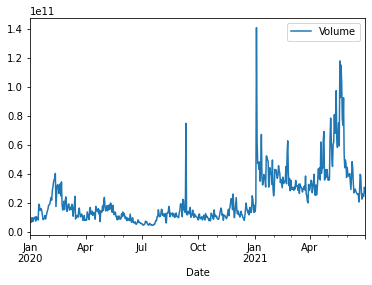

In [138]:
import matplotlib.pyplot as plt
df.plot(x='Date', y='Volume')

In [139]:
pd.crosstab(index=df['Quarter'], columns='Volume avg', values=df['Volume'],aggfunc='mean')

col_0,Volume avg
Quarter,
2020Q1,1.653456e+10
2020Q2,1.158150e+10
2020Q3,1.127764e+10
2020Q4,1.259794e+10
2021Q1,3.702415e+10
2021Q2,4.604626e+10


CONCLUSION
Ethereum transaction volume relatively stable in 2020 and significantly increased from Q1 2021, with maximum average of transaction was reached on Q2 2021.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.